In [1]:
from dask.distributed import Client
client = Client(processes=False, threads_per_worker=8, n_workers=6, memory_limit='256GB')

# Intake to load CMIP data

## Using intake-esm on mistral
- install intake-esm: https://intake-esm.readthedocs.io/en/latest/installation.html
- check the already built catalogs: `/home/mpim/m300524/.intake_esm/collections` and copy to `/home/mpim/mxxxxxx/.intake_esm/collections` skip long catalog building process

In [2]:
import intake
import xarray as xr
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

/work/mh0727/m300524/anaconda3/envs/xr/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


# CMIP5

In [3]:
collection_input_definition = '/home/mpim/m300524/pymistral/intake/cmip5_collection_mistral.yml'

In [4]:
col = intake.open_esm_metadatastore(collection_input_definition=collection_input_definition, overwrite_existing=False)

In [5]:
col.df.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
0,CMIP5,r2i1p1,decadal1960,hfss_3hr_FGOALS-g2_decadal1960_r2i1p1_19910101...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010130-199101202230,hfss,v0
1,CMIP5,r2i1p1,decadal1960,rsdsdiff_3hr_FGOALS-g2_decadal1960_r2i1p1_1991...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010130-199101202230,rsdsdiff,v0
2,CMIP5,r2i1p1,decadal1960,huss_3hr_FGOALS-g2_decadal1960_r2i1p1_19910101...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010300-199101210000,huss,v0
3,CMIP5,r1i1p1,decadal1960,ps_3hr_FGOALS-g2_decadal1960_r1i1p1_1991010103...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010300-199101260000,ps,v0
4,CMIP5,r1i1p1,decadal1960,rsuscs_3hr_FGOALS-g2_decadal1960_r1i1p1_199101...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,/work/kd0956/CMIP5/data/cmip5/output1/LASG-CES...,3hr,LASG-CESS,3hr,FGOALS-g2,atmos,output1,199101010130-199101252230,rsuscs,v0


In [6]:
cmip5_variables = col.df['variable'].unique()

In [7]:
for v in ['institute','model','experiment','frequency','mip_table','modeling_realm','product']:
    print(v,col.df[v].unique(),'\n')

institute ['LASG-CESS' 'LASG-IAP' 'CCCma' 'CSIRO-QCCCE' 'BCC' 'ICHEC' 'CSIRO-BOM'
 'NSF-DOE-NCAR' 'MOHC' 'NOAA-GFDL' 'INM' 'IPSL' 'CNRM-CERFACS' 'MIROC'
 'MPI-M' 'MRI' 'NCC' 'NCAR' 'CMCC' 'BNU' 'NASA-GMAO' 'NASA-GISS'
 'NIMR-KMA' 'FIO' 'NICAM' 'NOAA-NCEP' 'COLA-CFS' 'INPE'] 

model ['FGOALS-g2' 'FGOALS-s2' 'CanESM2' 'CanAM4' 'FGOALS-gl' 'CSIRO-Mk3-6-0'
 'bcc-csm1-1' 'EC-EARTH' 'ACCESS1-0' 'ACCESS1-3' 'CESM1-WACCM'
 'HadGEM2-ES' 'GFDL-ESM2M' 'inmcm4' 'IPSL-CM5A-LR' 'HadGEM2-A' 'GFDL-CM3'
 'GFDL-HIRAM-C360' 'GFDL-CM2p1' 'GFDL-ESM2G' 'GFDL-HIRAM-C180' 'CNRM-CM5'
 'HadCM3' 'MIROC4h' 'MIROC5' 'MPI-ESM-LR' 'MRI-CGCM3' 'NorESM1-M'
 'MRI-AGCM3-2H' 'MRI-AGCM3-2S' 'HadGEM2-CC' 'MIROC-ESM' 'MIROC-ESM-CHEM'
 'MPI-ESM-P' 'IPSL-CM5A-MR' 'IPSL-CM5B-LR' 'CCSM4' 'NorESM1-ME'
 'MPI-ESM-MR' 'CMCC-CM' 'CESM1-CAM5-1-FV2' 'BNU-ESM' 'GEOS-5' 'GISS-E2-R'
 'GISS-E2-H' 'HadGEM2-AO' 'CESM1-CAM5' 'FIO-ESM' 'CESM1-FASTCHEM'
 'fio-esm' 'CESM1-BGC' 'CanCM4' 'MRI-ESM1' 'NICAM-09' 'bcc-csm1-1-m'
 'CMCC-CMS' 'GISS-E2-R

In [8]:
cat = col.search(experiment='piControl',variable=['tos'],mip_table='Omon',ensemble_member='r1i1p1')

In [9]:
qr=cat.query_results
qr.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
556618,CMIP5,r1i1p1,piControl,tos_Omon_bcc-csm1-1-m_piControl_r1i1p1_000101-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Omon,bcc-csm1-1-m,ocean,output1,000101-040012,tos,v20120705
200327,CMIP5,r1i1p1,piControl,tos_Omon_bcc-csm1-1_piControl_r1i1p1_000101-05...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Omon,bcc-csm1-1,ocean,output1,000101-050012,tos,v20120202
290287,CMIP5,r1i1p1,piControl,tos_Omon_BNU-ESM_piControl_r1i1p1_145001-20081...,/work/kd0956/CMIP5/data/cmip5/output1/BNU/BNU-...,/work/kd0956/CMIP5/data/cmip5/output1/BNU/BNU-...,mon,BNU,Omon,BNU-ESM,ocean,output1,145001-200812,tos,v20120504
241348,CMIP5,r1i1p1,piControl,tos_Omon_CanESM2_piControl_r1i1p1_291101-30101...,/work/kd0956/CMIP5/data/cmip5/output1/CCCma/Ca...,/work/kd0956/CMIP5/data/cmip5/output1/CCCma/Ca...,mon,CCCma,Omon,CanESM2,ocean,output1,291101-301012,tos,v20120410
769735,CMIP5,r1i1p1,piControl,tos_Omon_CMCC-CESM_piControl_r1i1p1_459401-460...,/work/kd0956/CMIP5/data/cmip5/output1/CMCC/CMC...,/work/kd0956/CMIP5/data/cmip5/output1/CMCC/CMC...,mon,CMCC,Omon,CMCC-CESM,ocean,output1,459401-460012,tos,v20130417


In [10]:
qr[['institute','model']]

,institute,model
556618,BCC,bcc-csm1-1-m
200327,BCC,bcc-csm1-1
290287,BNU,BNU-ESM
241348,CCCma,CanESM2
769735,CMCC,CMCC-CESM
698368,CMCC,CMCC-CM
609711,CMCC,CMCC-CMS
768191,CNRM-CERFACS,CNRM-CM5-2
650469,CNRM-CERFACS,CNRM-CM5
786473,CSIRO-BOM,ACCESS1-0


In [ ]:
ds = cat.to_xarray()

In [ ]:
ds.keys()

## Load DCPP
- load one variable of a few decadalxxxx experiments
- take yearmonmean
- regrid to 5x5

In [5]:
decadals = [i for i in col.df.experiment.unique() if i.startswith('decadal')]
decadals.sort()

In [6]:
#decadals = decadals[2:-12:10]
decadals = decadals[2:-12]
decadals

['decadal1961',
 'decadal1962',
 'decadal1963',
 'decadal1964',
 'decadal1965',
 'decadal1966',
 'decadal1967',
 'decadal1968',
 'decadal1969',
 'decadal1970',
 'decadal1971',
 'decadal1972',
 'decadal1973',
 'decadal1974',
 'decadal1975',
 'decadal1976',
 'decadal1977',
 'decadal1978',
 'decadal1979',
 'decadal1980',
 'decadal1981',
 'decadal1982',
 'decadal1983',
 'decadal1984',
 'decadal1985',
 'decadal1986',
 'decadal1987',
 'decadal1988',
 'decadal1989',
 'decadal1990',
 'decadal1991',
 'decadal1992',
 'decadal1993',
 'decadal1994',
 'decadal1995',
 'decadal1996',
 'decadal1997',
 'decadal1998',
 'decadal1999',
 'decadal2000']

In [7]:
v='tos'

In [8]:
cat = col.search(experiment=decadals,variable=v,mip_table='Omon')

In [9]:
cat.query_results.head()

,activity,ensemble_member,experiment,file_basename,file_dirname,file_fullpath,frequency,institute,mip_table,model,modeling_realm,product,temporal_subset,variable,version
660158,CMIP5,r1i1p1,decadal1961,tos_Omon_bcc-csm1-1_decadal1961_r1i1p1_196201-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Omon,bcc-csm1-1,ocean,output1,196201-197112,tos,v20121026
660071,CMIP5,r2i1p1,decadal1961,tos_Omon_bcc-csm1-1_decadal1961_r2i1p1_196201-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Omon,bcc-csm1-1,ocean,output1,196201-197112,tos,v20121026
660160,CMIP5,r3i1p1,decadal1961,tos_Omon_bcc-csm1-1_decadal1961_r3i1p1_196201-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Omon,bcc-csm1-1,ocean,output1,196201-197112,tos,v20121026
660724,CMIP5,r1i1p1,decadal1962,tos_Omon_bcc-csm1-1_decadal1962_r1i1p1_196301-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Omon,bcc-csm1-1,ocean,output1,196301-197212,tos,v20121026
660742,CMIP5,r2i1p1,decadal1962,tos_Omon_bcc-csm1-1_decadal1962_r2i1p1_196301-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,/work/kd0956/CMIP5/data/cmip5/output1/BCC/bcc-...,mon,BCC,Omon,bcc-csm1-1,ocean,output1,196301-197212,tos,v20121026


In [10]:
models = list(cat.query_results['model'].unique())
if 'MIROC5' in models:
    models.remove('MIROC5')
models

['bcc-csm1-1',
 'CanCM4',
 'CMCC-CM',
 'CNRM-CM5',
 'CFSv2-2011',
 'EC-EARTH',
 'IPSL-CM5A-LR',
 'HadCM3',
 'MPI-ESM-LR',
 'MPI-ESM-MR',
 'MRI-CGCM3',
 'CCSM4',
 'GFDL-CM2p1']

In [11]:
import xesmf as xe

# testing how fast
def spatial_smoothing(ds, boxsize=(5, 5),**kwargs):
    if isinstance(ds, xr.Dataset):
        ds = ds.to_array().squeeze()
    ds_out = xe.util.grid_global(*boxsize)
    regridder = xe.Regridder(ds, ds_out, 'bilinear', reuse_weights=True,**kwargs)
    return regridder(ds)

In [12]:
DCPP_outpath = '/work/mh0727/m300524/CMIP5_post/DCPP/'

In [13]:
model_list=[]
dcpp_list = []
member_list = []
for i,model in enumerate(models):
    cat = col.search(experiment=decadals,variable='tos',mip_table='Omon',model=model)#,ensemble_member=['r1i1p1','r2i1p1'])
    inits = list(cat.query_results['experiment'].unique())
    inits.sort()
    if not inits == decadals:
        print(inits)
        print(decadals)
        print('skip',model)
        continue

    print(model,'files to load:',cat.query_results.index.size)

    dcpp_1model_list = cat.to_xarray()
    
    l=[]
    for k in list(dcpp_1model_list.keys()):
        tmp2 = dcpp_1model_list[k][v]
        tmp2['time']=xr.cftime_range('2001',periods=tmp2.time.size,freq='M')
        l.append(tmp2)    
    dcpp_1model = xr.concat(l,'init')
    dcpp_1model['init']=inits
    #print(dcpp_1model.coords)

    dcpp_1model=dcpp_1model.groupby('time.year').mean('time').rename({'year':'lead'})
    dcpp_1model['lead']=np.arange(1,1+dcpp_1model.lead.size)
    
    if model == 'MPI-ESM-LR':
        dcpp_1model = dcpp_1model.rename({'i':'x','j':'y'})
        tmp_mpiom = xr.open_dataset('/work/mh0727/m300524/masks/GR15_area.nc')['area'].squeeze()
        del tmp_mpiom['depth']
        del tmp_mpiom['time']
        dcpp_1model['lat']=tmp_mpiom.lat
        dcpp_1model['lon']=tmp_mpiom.lon
    
    #if model not in ['bcc-csm1-1']:
    for c in dcpp_1model.coords:
        if 'lat' in c:
            print('replace',c,'with lat')
            dcpp_1model=dcpp_1model.rename({c:'lat'})
        if 'lon' in c:
            print('replace',c,'with lon')
            dcpp_1model=dcpp_1model.rename({c:'lon'})
            
    if model == 'MIROC5':
        periodic=True
    else:
        periodic=False
        
    if dcpp_1model.lead.size > 10:
        dcpp_1model = dcpp_1model.isel(lead=slice(None,10))

    for dim in ['depth','depth2']:
        if dim in dcpp_1model:
            del dcpp_1model[dim]
            
    dcpp_1model55 = spatial_smoothing(dcpp_1model,periodic=periodic)
    dcpp_1model55['init'] = [int(i[-4:]) for i in dcpp_1model55.init.values]

    #dcpp_1model_mean = dcpp_1model.mean('member_id')
    fname = DCPP_outpath+'_'.join(['CMIP5_DCPP',v,model+'.nc'])
    dcpp_1model55.to_netcdf(fname)

    dcpp_list.append(dcpp_1model55)
    model_list.append(model)
    member_list.append(dcpp_1model55.member_id.size)

bcc-csm1-1 files to load: 128



replace rlat with lat
replace rlon with lon
Reuse existing file: bilinear_232x360_36x72.nc
CanCM4 files to load: 480



replace lat with lat
replace lon with lon
Reuse existing file: bilinear_192x256_36x72.nc
['decadal1965', 'decadal1970', 'decadal1975', 'decadal1980', 'decadal1985', 'decadal1990', 'decadal1995']
['decadal1961', 'decadal1962', 'decadal1963', 'decadal1964', 'decadal1965', 'decadal1966', 'decadal1967', 'decadal1968', 'decadal1969', 'decadal1970', 'decadal1971', 'decadal1972', 'decadal1973', 'decadal1974', 'decadal1975', 'decadal1976', 'decadal1977', 'decadal1978', 'decadal1979', 'decadal1980', 'decadal1981', 'decadal1982', 'decadal1983', 'decadal1984', 'decadal1985', 'decadal1986', 'decadal1987', 'decadal1988', 'decadal1989', 'decadal1990', 'decadal1991', 'decadal1992', 'decadal1993', 'decadal1994', 'decadal1995', 'decadal1996', 'decadal1997', 'decadal1998', 'decadal1999', 'decadal2000']
skip CMCC-CM
['decadal1964', 'decadal1965', 'decadal1969', 'decadal1970', 'decadal1974', 'decadal1975', 'decadal1979', 'decadal1980', 'decadal1984', 'decadal1985', 'decadal1989', 'decadal1990', 'decadal1


replace lat with lat
replace lon with lon
Reuse existing file: bilinear_144x288_36x72.nc
MPI-ESM-LR files to load: 176



replace lon with lon
replace lat with lat
Reuse existing file: bilinear_220x256_36x72.nc
['decadal1965', 'decadal1970', 'decadal1975', 'decadal1980', 'decadal1985', 'decadal1990', 'decadal1995', 'decadal2000']
['decadal1961', 'decadal1962', 'decadal1963', 'decadal1964', 'decadal1965', 'decadal1966', 'decadal1967', 'decadal1968', 'decadal1969', 'decadal1970', 'decadal1971', 'decadal1972', 'decadal1973', 'decadal1974', 'decadal1975', 'decadal1976', 'decadal1977', 'decadal1978', 'decadal1979', 'decadal1980', 'decadal1981', 'decadal1982', 'decadal1983', 'decadal1984', 'decadal1985', 'decadal1986', 'decadal1987', 'decadal1988', 'decadal1989', 'decadal1990', 'decadal1991', 'decadal1992', 'decadal1993', 'decadal1994', 'decadal1995', 'decadal1996', 'decadal1997', 'decadal1998', 'decadal1999', 'decadal2000']
skip MPI-ESM-MR
['decadal1965', 'decadal1970', 'decadal1975', 'decadal1980', 'decadal1985', 'decadal1990', 'decadal1995', 'decadal2000']
['decadal1961', 'decadal1962', 'decadal1963', 'deca


replace rlon with lon
replace rlat with lat
Reuse existing file: bilinear_200x360_36x72.nc


In [23]:
dcpp = xr.concat(dcpp_list,'model')
dcpp['model']=model_list

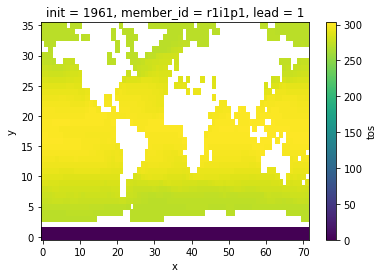

In [26]:
dcpp_list[0].isel(member_id=0,init=0,lead=0).plot()

In [32]:
dcpp = xr.concat((i.mean('member_id') for i in dcpp_list),'model')
dcpp['model']=model_list

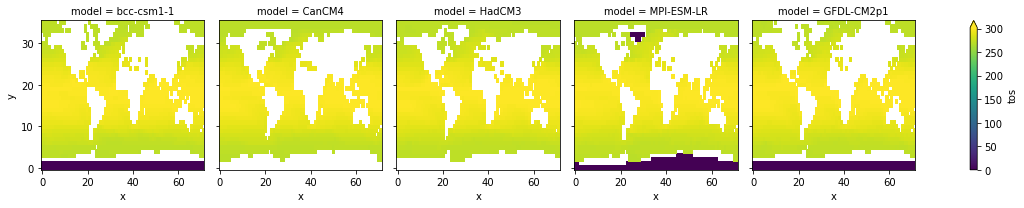

In [36]:
dcpp.isel(init=0,lead=0).plot(col='model',robust=True)

In [37]:
dcpp.to_netcdf(DCPP_outpath+'_'.join(['CMIP5_DCPP',v+'.nc']))

## Load assimilation

## Load obs

In [38]:
urlpath = '/pool/data/ICDC/ocean/hadisst1/DATA/HadISST_sst.nc'

In [39]:
hadisst = xr.open_dataset(urlpath,chunks={'time':120}).rename({'sst':'tos'})['tos']
hadisst = hadisst.rename({'latitude':'lat','longitude':'lon'}).sel(time=slice('1960','2010'))

In [40]:
hadisst = hadisst.groupby('time.year').mean('time').rename({'year':'time'})

In [41]:
hadisst = spatial_smoothing(hadisst)

Reuse existing file: bilinear_180x360_36x72.nc


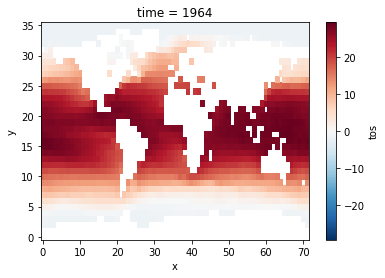

In [42]:
hadisst.isel(time=4).plot()

In [43]:
from climpred.prediction import compute_hindcast

## remove bias
not the official Boer et al. 2016 way

In [44]:
dcpp_rm_bias = dcpp - dcpp.mean('init')
hadisst_rm_bias = hadisst - hadisst.mean('time')

## global mean SST

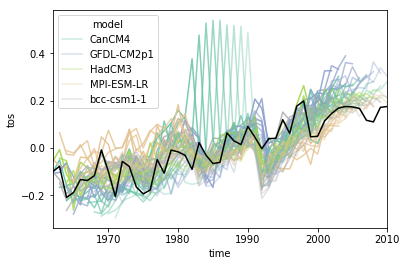

In [45]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
for l in dcpp_rm_bias.lead.values:
    if l == dcpp_rm_bias.lead.values[-1]:
        legend=True
    else:
        legend=False
    t=dcpp_rm_bias.sel(lead=l).mean(['x','y']).rename({'init':'time'})
    t['time']=[t+l for t in t.time.values]
    t.to_dataframe()[v].unstack(0).plot(ax=ax, legend=legend,colormap='Set2',alpha=1-l/15)

hadisst_rm_bias.mean(['x','y']).plot(color='k',label='HadISST',ax=ax)

## compute skill

In [49]:
hadisst_mm = hadisst.expand_dims('model')
hadisst_mm = hadisst_mm.isel(model=[0]*dcpp.model.size)+273.15
hadisst_mm['model']=dcpp.model

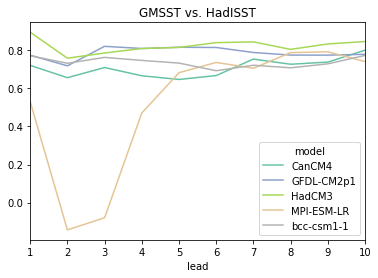

In [50]:
gskill = compute_hindcast(dcpp.mean(['x','y']),hadisst_mm.mean(['x','y']),metric='pearson_r')
gskill.to_dataframe()[v].unstack().plot(title='GMSST vs. HadISST',colormap='Set2')

In [51]:
skill = compute_hindcast(dcpp,hadisst_mm,metric='pearson_r')

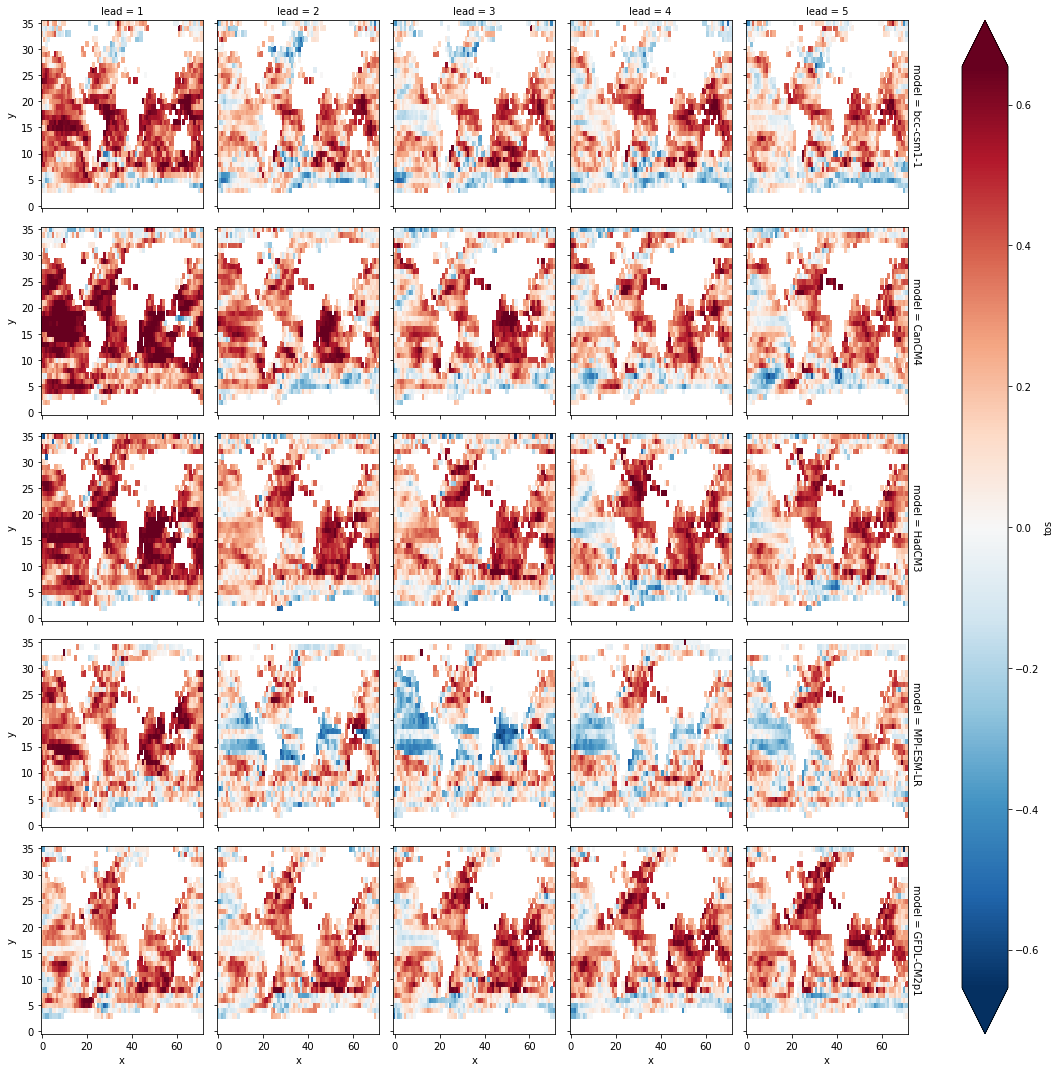

In [53]:
skill.isel(lead=slice(0,5)).plot(row='model',col='lead',robust=True)

#### rm trend

In [54]:
from climpred.stats import rm_poly
order=1

In [55]:
hadisst_mm_rm_trend = rm_poly(hadisst_mm,order=order)

In [56]:
dcpp_rm_trend = rm_poly(dcpp,order=order,dim='init')

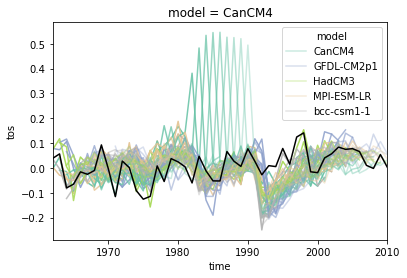

In [57]:
fig,ax=plt.subplots()
for l in dcpp_rm_trend.lead.values:
    if l == dcpp_rm_trend.lead.values[-1]:
        legend=True
    else:
        legend=False
    t=dcpp_rm_trend.sel(lead=l).mean(['x','y']).rename({'init':'time'})
    t['time']=[t+l for t in t.time.values]
    t.to_dataframe()[v].unstack(0).plot(ax=ax, legend=legend,colormap='Set2',alpha=1-l/15)

hadisst_mm_rm_trend.mean(['x','y']).isel(model=1).plot(color='k',label='HadISST',ax=ax)

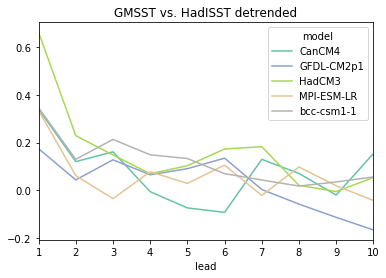

In [63]:
gskill_rm_trend = compute_hindcast(dcpp_rm_trend.mean(['x','y']),hadisst_mm_rm_trend.mean(['x','y']),metric='pearson_r')
gskill_rm_trend.to_dataframe()[v].unstack().plot(title='GMSST vs. HadISST detrended',colormap='Set2')

In [59]:
skill_rm_trend = compute_hindcast(dcpp_rm_trend,hadisst_mm_rm_trend,metric='pearson_r')

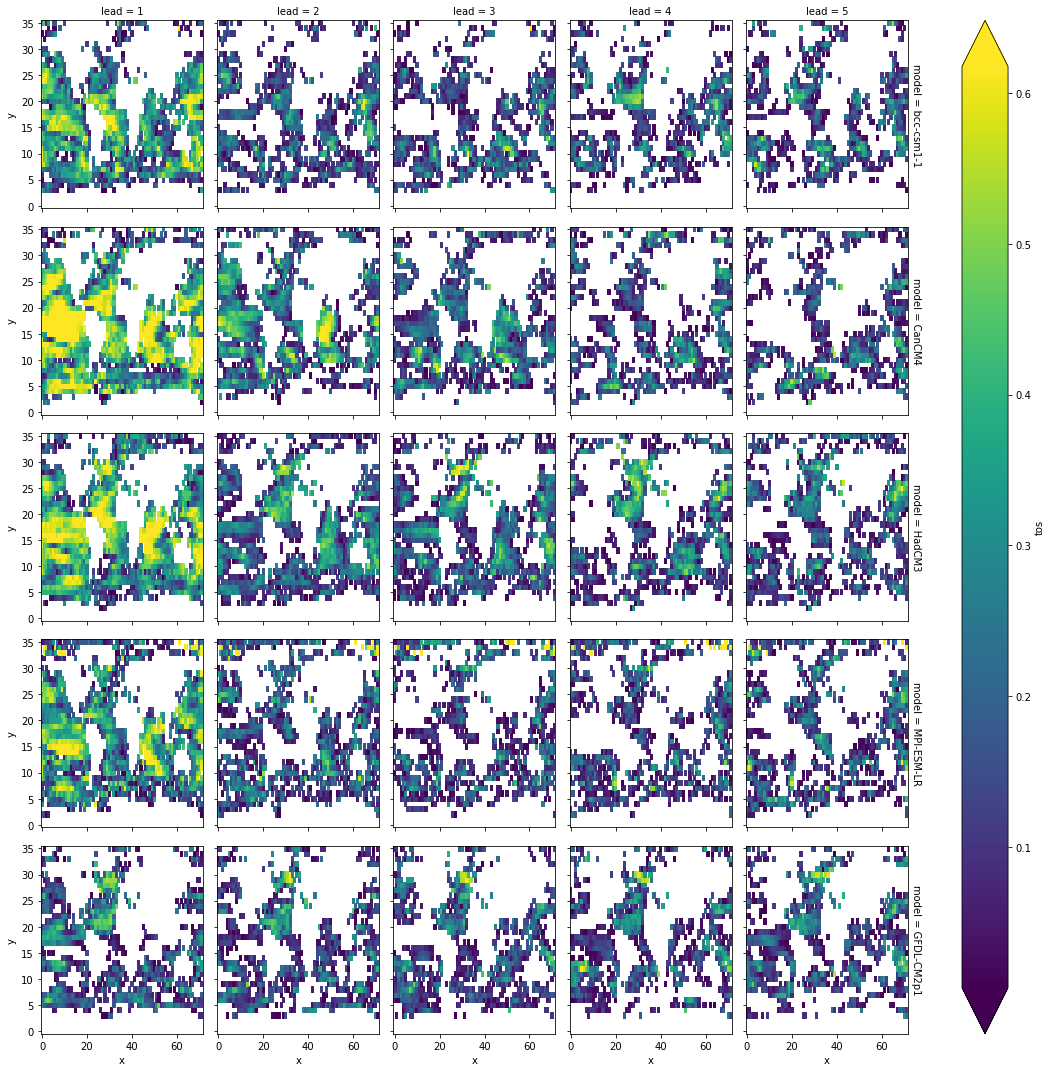

In [61]:
skill_rm_trend.isel(lead=slice(0,5)).where(skill_rm_trend>0).plot(row='model',col='lead',robust=True)

# CMIP6

In [4]:
collection_input_definition = '/home/mpim/m300524/pymistral/intake/cmip6_collection_mistral.yml'

In [5]:
!cat /home/mpim/m300524/pymistral/intake/cmip6_collection_mistral.yml

/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `BASH_FUNC_module'
name: cmip6_collection_mistral
collection_type: cmip6
data_sources:
  root_dir:
    name: MISTRAL
    loc_type: posix
    direct_access: True
    urlpath: /work/kd0956/CMIP6
    exclude_dirs: ['test_data','CMIP6','dc_repli/*','dc_test_data/*']


In [6]:
col = intake.open_esm_metadatastore(collection_input_definition=collection_input_definition, overwrite_existing=False)

In [7]:
col.df.head()

,activity_id,experiment_id,file_basename,file_dirname,file_fullpath,grid_label,institution_id,member_id,mip_era,source_id,table_id,time_range,variable_id,version
0,CMIP,1pctCO2,tos_Omon_CNRM-CM6-1_1pctCO2_r99i1p1f2_gn_18500...,/work/kd0956/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-...,/work/kd0956/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-...,gn,CNRM-CERFACS,r99i1p1f2,CMIP6,CNRM-CM6-1,Omon,185001-185001,tos,v20180424
